In [27]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   


In [ ]:
dados_conexao = (
    "Driver={SQL Server};"
    "Server= Meu_Servidor;"
    "Database=RenovaBr;"
)

conexao = pyodbc.connect(dados_conexao)
print ("Conexão bem sucedida!")

Conexão bem sucedida!


In [6]:
df_deputados = pd.read_sql("SELECT * FROM Deputados", conexao)
df_despesas = pd.read_sql("SELECT * FROM Deputados_Despesas", conexao)

C:\Users\vitor\AppData\Local\Temp\ipykernel_15848\3939569840.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_deputados = pd.read_sql("SELECT * FROM Deputados", conexao)
C:\Users\vitor\AppData\Local\Temp\ipykernel_15848\3939569840.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_despesas = pd.read_sql("SELECT * FROM Deputados_Despesas", conexao)


In [ ]:
#Removendo duplicatas
df_deputados = df_deputados.drop_duplicates()
print (df_deputados)


         id             nome siglaPartido siglaUf  \
0     62881     Danilo Forte        UNIÃO      CE   
1     66385  Julio Arcoverde           PP      PI   
2     66828    Fausto Pinato           PP      SP   
3     69871          Bacelar           PV      BA   
4     72442  Felipe Carreras          PSB      PE   
..      ...              ...          ...     ...   
507  231911   Lenir de Assis           PT      PR   
508  233218  Nelinho Freitas          MDB      CE   
509  233592      Paulo Lemos         PSOL      AP   
510  233594      Rafael Fera         PODE      RO   
511  233598    Samuel Santos         PODE      GO   

                                email  
0       dep.daniloforte@camara.leg.br  
1    dep.julioarcoverde@camara.leg.br  
2      dep.faustopinato@camara.leg.br  
3           dep.bacelar@camara.leg.br  
4    dep.felipecarreras@camara.leg.br  
..                                ...  
507    dep.lenirdeassis@camara.leg.br  
508  dep.nelinhofreitas@camara.leg.br  
509

In [10]:
df_despesas = df_despesas.drop_duplicates()
print (df_despesas)

        id  id_deputado   ano  mes  \
0        1       204379  2025    4   
1        2       204379  2025    5   
2        3       204379  2025    6   
3        4       204379  2025    7   
4        5       204379  2025    8   
...    ...          ...   ...  ...   
7630  7631       220552  2025    7   
7631  7632       220552  2025    4   
7632  7633       220552  2025    5   
7633  7634       220552  2025    6   
7634  7635       220552  2025    7   

                                            tipoDespesa   tipoDocumento  \
0     MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...     Nota Fiscal   
1     MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...     Nota Fiscal   
2     MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...     Nota Fiscal   
3     MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...     Nota Fiscal   
4     MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...     Nota Fiscal   
...                                                 ...             ...   
7630  MANUTENÇÃO D

In [13]:
print(df_deputados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            512 non-null    int64 
 1   nome          512 non-null    object
 2   siglaPartido  512 non-null    object
 3   siglaUf       512 non-null    object
 4   email         512 non-null    object
dtypes: int64(1), object(4)
memory usage: 20.1+ KB
None


In [14]:
print(df_despesas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7635 entries, 0 to 7634
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7635 non-null   int64  
 1   id_deputado    7635 non-null   int64  
 2   ano            7635 non-null   int64  
 3   mes            7635 non-null   int64  
 4   tipoDespesa    7635 non-null   object 
 5   tipoDocumento  7635 non-null   object 
 6   valorLiquido   7635 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 417.7+ KB
None


In [16]:
#Verificandon se há valores nulos
df_deputados.isnull().sum()
df_despesas.isnull().sum()

id               0
id_deputado      0
ano              0
mes              0
tipoDespesa      0
tipoDocumento    0
valorLiquido     0
dtype: int64

In [22]:
df_deputados.head()

,id,nome,siglaPartido,siglaUf,email
0,62881,Danilo Forte,UNIÃO,CE,dep.daniloforte@camara.leg.br
1,66385,Julio Arcoverde,PP,PI,dep.julioarcoverde@camara.leg.br
2,66828,Fausto Pinato,PP,SP,dep.faustopinato@camara.leg.br
3,69871,Bacelar,PV,BA,dep.bacelar@camara.leg.br
4,72442,Felipe Carreras,PSB,PE,dep.felipecarreras@camara.leg.br


In [23]:
df_despesas.head()

,id,id_deputado,ano,mes,tipoDespesa,tipoDocumento,valorLiquido
0,1,204379,2025,4,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,750.0
1,2,204379,2025,5,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,750.0
2,3,204379,2025,6,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,750.0
3,4,204379,2025,7,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,800.0
4,5,204379,2025,8,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,800.0


In [24]:
#Garantindo que os dados estejam padronizados
df_deputados['siglaPartido'] = df_deputados['siglaPartido'].str.upper()
df_deputados['siglaUf'] = df_deputados['siglaUf'].str.upper()

df_despesas['tipoDespesa'] = df_despesas['tipoDespesa'].str.upper()


In [28]:
# Combinando os dois DataFrames
df_deputados_despesas = pd.merge(df_deputados, df_despesas, left_on='id', right_on='id_deputado', how='left')
df_deputados_despesas.head()

,id_x,nome,siglaPartido,siglaUf,email,id_y,id_deputado,ano,mes,tipoDespesa,tipoDocumento,valorLiquido
0,62881,Danilo Forte,UNIÃO,CE,dep.daniloforte@camara.leg.br,1726.0,62881.0,2025.0,7.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,104.58
1,62881,Danilo Forte,UNIÃO,CE,dep.daniloforte@camara.leg.br,1727.0,62881.0,2025.0,8.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,104.58
2,62881,Danilo Forte,UNIÃO,CE,dep.daniloforte@camara.leg.br,1728.0,62881.0,2025.0,5.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,291.60
3,62881,Danilo Forte,UNIÃO,CE,dep.daniloforte@camara.leg.br,1729.0,62881.0,2025.0,4.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Nota Fiscal,291.60
4,62881,Danilo Forte,UNIÃO,CE,dep.daniloforte@camara.leg.br,1730.0,62881.0,2025.0,6.0,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Recibos/Outros,291.60


In [43]:
# top 5 deputados que tem mais gastos (media mensal de gastos - últimos 3 anos)
tres_anos = df_deputados_despesas [df_deputados_despesas['ano']>=2023]
gastos_mensais = tres_anos.groupby(['id_deputado', 'mes'])['valorLiquido'].sum().reset_index()
media_mensal = gastos_mensais.groupby('id_deputado')['valorLiquido'].mean().reset_index()
media_mensal=media_mensal.merge(df_deputados_despesas[['id_deputado', 'nome']].drop_duplicates(), on='id_deputado', how='left')
top5_mais = media_mensal.sort_values('valorLiquido', ascending=False).head(5).reset_index()

print(top5_mais)

   index  id_deputado  valorLiquido             nome
0    457     220681.0  55276.770000     Fábio Macedo
1    492     224117.0  41833.333333     Gabriel Mota
2    465     220689.0  41500.000000          Detinha
3    506     233218.0  38533.987500  Nelinho Freitas
4    279     204498.0  37639.282000   Olival Marques


In [44]:
# top 5 deputados que tem mais gastos (media mensal de gastos - últimos 3 anos)
top5_menos = media_mensal.sort_values('valorLiquido', ascending=True).head(5).reset_index()
print(top5_menos)

   index  id_deputado  valorLiquido              nome
0     96     141470.0    121.096667    José Guimarães
1    160     178829.0    155.966667   Capitão Augusto
2    354     220559.0    236.656000     Julia Zanatta
3    223     204374.0    312.712000         Bia Kicis
4    273     204489.0    323.066667  Robério Monteiro


In [57]:
# Quais os maiores gastos por deputado (top 5)
top5_ids = top5_mais['id_deputado'].tolist()
df_top5_mais = df_deputados_despesas[df_deputados_despesas['id_deputado'].isin(top5_ids)]
tipo_gastos = df_top5_mais.groupby(['id_deputado', 'nome', 'tipoDespesa'])['valorLiquido'].sum().reset_index()
top5_gastos_deputados = tipo_gastos.sort_values(['id_deputado', 'valorLiquido'], ascending=[False, False]).groupby('id_deputado').head(5)
print(top5_gastos_deputados)


    id_deputado             nome  \
9      233218.0  Nelinho Freitas   
8      233218.0  Nelinho Freitas   
11     233218.0  Nelinho Freitas   
10     233218.0  Nelinho Freitas   
7      224117.0     Gabriel Mota   
6      224117.0     Gabriel Mota   
4      220689.0          Detinha   
5      220689.0          Detinha   
2      220681.0     Fábio Macedo   
3      220681.0     Fábio Macedo   
0      204498.0   Olival Marques   
1      204498.0   Olival Marques   

                                          tipoDespesa  valorLiquido  
9                DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.     153000.00  
8                       COMBUSTÍVEIS E LUBRIFICANTES.       1090.10  
11                                          TELEFONIA        119.85  
10                            PASSAGEM AÉREA - SIGEPA        -74.00  
7   MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...     163000.00  
6                DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.      88000.00  
4                DIVULGAÇÃO DA ATIVIDADE 

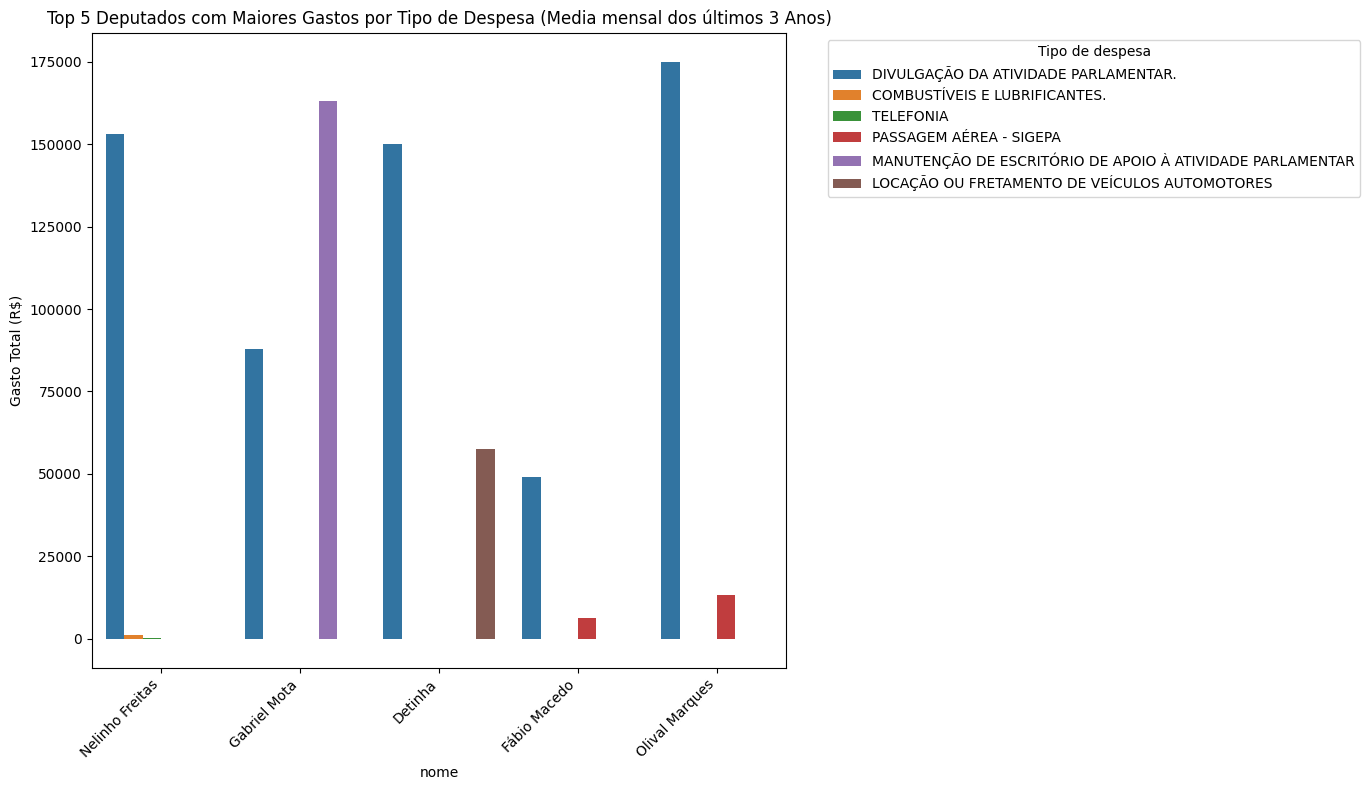

In [58]:
#plotando gráfico sobre as despesas dos deputados
plt.figure(figsize=(14, 8))
sns.barplot(data=top5_gastos_deputados, x='nome', y='valorLiquido', hue='tipoDespesa')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Gasto Total (R$)')
plt.title('Top 5 Deputados com Maiores Gastos por Tipo de Despesa (Media mensal dos últimos 3 Anos)')
plt.legend(title='Tipo de despesa', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()